In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML DATASET/winequality-red (1).csv", delimiter=';')

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**We don't have any missing data, so we will move on to visualization**

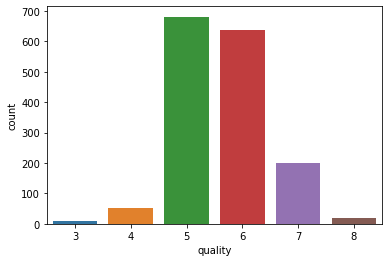

In [ ]:
sns.countplot(data["quality"])
plt.show()

**Heatmap is used to see the correlation between our features.**

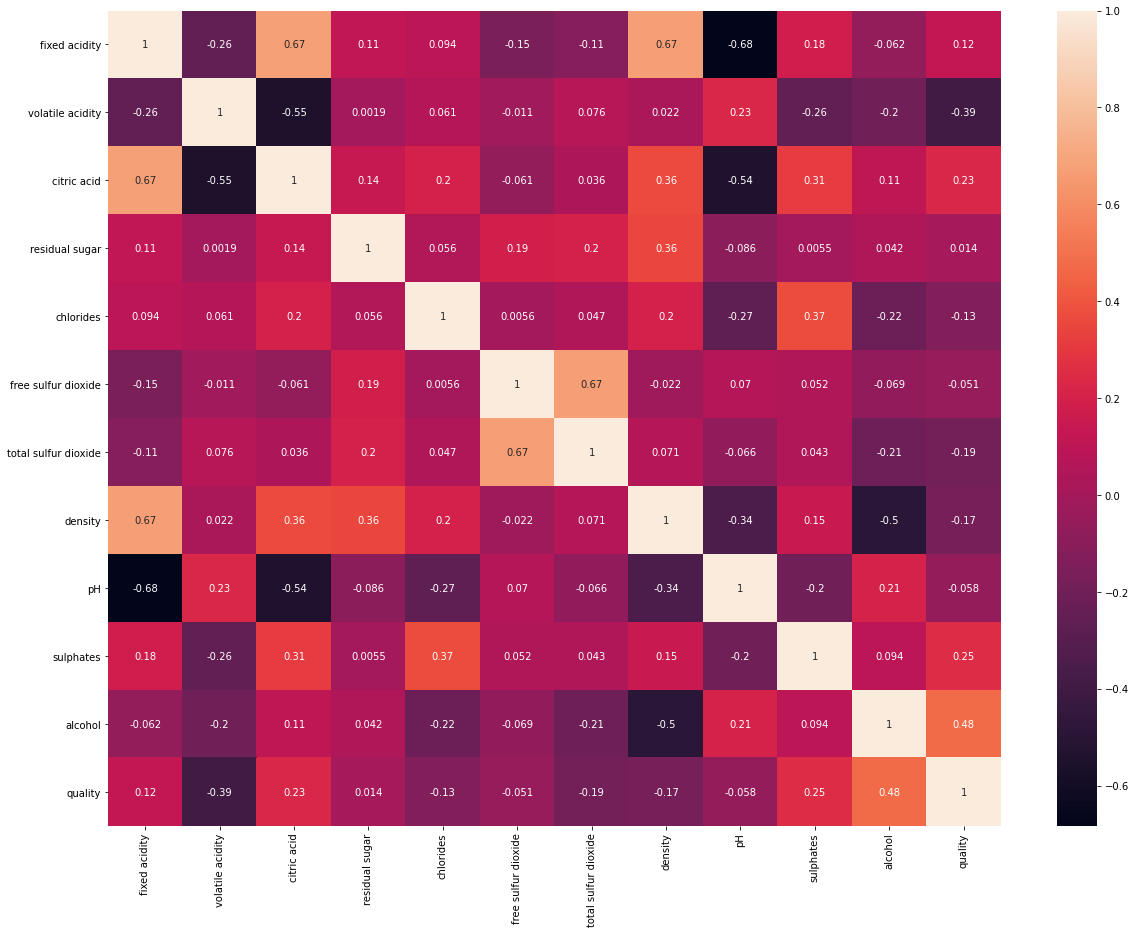

In [ ]:
plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
bins = (2, 6, 8)
group = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels=group)

In [ ]:
label_encod = LabelEncoder()
data['quality'] = label_encod.fit_transform(data['quality'])

In [ ]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

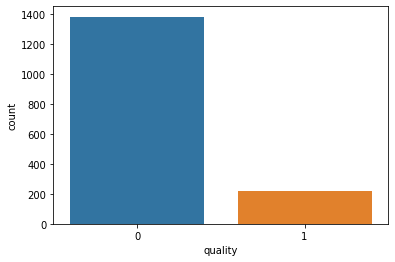

In [ ]:
sns.countplot(data['quality'])

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**USING GRIDCV on SVC**

In [ ]:
svc = SVC()

In [ ]:
param = {
    'C' : [0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
    'kernel': ['linear', 'rbf'],
    'gamma' : [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
}

grid_cv = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
svc = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



**Decision Tree**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, pred_dt))
#its accuracy increases to 90% after making test data = 0.25

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       273
           1       0.45      0.45      0.45        47

    accuracy                           0.84       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.84      0.84      0.84       320



**USING Random forest**

In [ ]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)
y_predrf = model_rf.predict(X_test)
print(classification_report(y_test, y_predrf))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.73      0.40      0.52        47

    accuracy                           0.89       320
   macro avg       0.82      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320



**USING XGBOOST**

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=1)
model_xgb.fit(X_train, y_train)
y_predxgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.57      0.26      0.35        47

    accuracy                           0.86       320
   macro avg       0.73      0.61      0.64       320
weighted avg       0.84      0.86      0.84       320



**USING KNN MODEL**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_predknn = model_knn.predict(X_test)
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320



In [ ]:
data_temp = data[data['quality']==1]
data_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


**Through the above description we can see that good quality wines have higher levels of alcohol**

In [ ]:
data_temp2 = data[data['quality']==0]
data_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0
